## Data Wrangling and preprocessing

In [1]:
# importing libraries for data preprocessing
import numpy as np
import pandas as pd

In [2]:
# to display the whole data when it's needed

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [3]:
np.set_printoptions(suppress = True, linewidth = 100, precision = 2)

In [4]:
raw_data = np.genfromtxt("F:/Data_Analysis_Projects/EnglandWeather/EnglandWeatherData/EnglandWeather.csv", 
                          delimiter = ',',
                          skip_header = True,
                          autostrip = True)
raw_data

array([[    nan,     nan,     nan, ...,   14.12, 1015.13,    0.89],
       [    nan,     nan,     nan, ...,   14.26, 1015.63,    0.86],
       [    nan,     nan,     nan, ...,    3.93, 1015.94,    0.89],
       ...,
       [    nan,     nan,     nan, ...,    8.98, 1015.66,    0.56],
       [    nan,     nan,     nan, ...,   10.53, 1015.95,    0.6 ],
       [    nan,     nan,     nan, ...,    5.88, 1016.16,    0.61]])

### Checking For Incomplete Data

In [5]:
np.isnan(raw_data).sum()

289359

In [6]:
temporary_mean = np.nanmean(raw_data, axis = 0)
temporary_mean

C:\Users\amrsh\AppData\Local\Temp\ipykernel_14068\2836188066.py:1: RuntimeWarning: Mean of empty slice
  temporary_mean = np.nanmean(raw_data, axis = 0)


array([    nan,     nan,     nan,   11.93,   10.81, 1003.24,    0.73])

### Spliting The Dataset

#### Spliting The Columns

In [7]:
columns_strings = np.argwhere(np.isnan(temporary_mean)).squeeze()
columns_strings

array([0, 1, 2], dtype=int64)

In [8]:
columns_numeric = np.argwhere(np.isnan(temporary_mean) == False).squeeze()
columns_numeric

array([3, 4, 5, 6], dtype=int64)

### Reimporting The Data

In [9]:
weather_data_string = np.genfromtxt("F:/Data_Analysis_Projects/EnglandWeather/EnglandWeatherData/EnglandWeather.csv", 
                          delimiter = ',',
                          skip_header = True,
                          autostrip = True,
                          usecols = columns_strings,
                          dtype = np.str_)
weather_data_string

array([['2006-04-01 00:00:00.000 +0200', 'Partly Cloudy', 'rain'],
       ['2006-04-01 01:00:00.000 +0200', 'Partly Cloudy', 'rain'],
       ['2006-04-01 02:00:00.000 +0200', 'Mostly Cloudy', 'rain'],
       ...,
       ['2016-09-09 21:00:00.000 +0200', 'Partly Cloudy', 'rain'],
       ['2016-09-09 22:00:00.000 +0200', 'Partly Cloudy', 'rain'],
       ['2016-09-09 23:00:00.000 +0200', 'Partly Cloudy', 'rain']], dtype='<U35')

In [10]:
weather_data_numeric = np.genfromtxt("F:/Data_Analysis_Projects/EnglandWeather/EnglandWeatherData/EnglandWeather.csv", 
                          delimiter = ',',
                          skip_header = True,
                          autostrip = True,
                          usecols = columns_numeric)
weather_data_numeric

array([[   9.47,   14.12, 1015.13,    0.89],
       [   9.36,   14.26, 1015.63,    0.86],
       [   9.38,    3.93, 1015.94,    0.89],
       ...,
       [  22.04,    8.98, 1015.66,    0.56],
       [  21.52,   10.53, 1015.95,    0.6 ],
       [  20.44,    5.88, 1016.16,    0.61]])

### Names Of Columns

In [11]:
header_names = np.genfromtxt("F:/Data_Analysis_Projects/EnglandWeather/EnglandWeatherData/EnglandWeather.csv", 
                              delimiter = ',',
                              skip_footer = raw_data.shape[0],
                              autostrip = True,
                              dtype = np.str_)
header_names

array(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Wind Speed (km/h)',
       'Pressure (millibars)', 'Humidity'], dtype='<U20')

In [12]:
header_strings, header_numeric = header_names[columns_strings], header_names[columns_numeric]

In [13]:
header_strings

array(['Formatted Date', 'Summary', 'Precip Type'], dtype='<U20')

In [14]:
header_numeric

array(['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity'], dtype='<U20')

### Creating Checkpoints

In [15]:
def checkpoint(file_name, checkpoint_header, checkpoint_data):
    np.savez(file_name, header = checkpoint_header, data = checkpoint_data)
    checkpoint_variable = np.load(file_name + ".npz")
    return (checkpoint_variable)

In [16]:
checkpoint_test = checkpoint("checkpoint-test", header_strings, weather_data_string)

In [17]:
checkpoint_test["data"]

array([['2006-04-01 00:00:00.000 +0200', 'Partly Cloudy', 'rain'],
       ['2006-04-01 01:00:00.000 +0200', 'Partly Cloudy', 'rain'],
       ['2006-04-01 02:00:00.000 +0200', 'Mostly Cloudy', 'rain'],
       ...,
       ['2016-09-09 21:00:00.000 +0200', 'Partly Cloudy', 'rain'],
       ['2016-09-09 22:00:00.000 +0200', 'Partly Cloudy', 'rain'],
       ['2016-09-09 23:00:00.000 +0200', 'Partly Cloudy', 'rain']], dtype='<U35')

In [18]:
np.array_equal(checkpoint_test["data"], weather_data_string)

True

### Manipulating String Columns

In [19]:
header_strings

array(['Formatted Date', 'Summary', 'Precip Type'], dtype='<U20')

In [20]:
header_strings[0] = "formatted_date"
header_strings[1] = "summary"
header_strings[2] = "precip_type"

In [21]:
header_strings

array(['formatted_date', 'summary', 'precip_type'], dtype='<U20')

#### Formatted Date

In [22]:
np.unique(weather_data_string[:,0])

array(['2006-01-01 00:00:00.000 +0100', '2006-01-01 01:00:00.000 +0100',
       '2006-01-01 02:00:00.000 +0100', ..., '2016-12-31 21:00:00.000 +0100',
       '2016-12-31 22:00:00.000 +0100', '2016-12-31 23:00:00.000 +0100'], dtype='<U35')

In [23]:
date_array = weather_data_string[:,0]
date_array

array(['2006-04-01 00:00:00.000 +0200', '2006-04-01 01:00:00.000 +0200',
       '2006-04-01 02:00:00.000 +0200', ..., '2016-09-09 21:00:00.000 +0200',
       '2016-09-09 22:00:00.000 +0200', '2016-09-09 23:00:00.000 +0200'], dtype='<U35')

In [24]:
# Strip the date from the hours
stripped_date_array = np.array([strip.split(" ")[0] for strip in date_array])
stripped_date_array

array(['2006-04-01', '2006-04-01', '2006-04-01', ..., '2016-09-09', '2016-09-09', '2016-09-09'],
      dtype='<U10')

In [25]:
stripped_date_array.astype(dtype = np.datetime64)
type(stripped_date_array[0])

numpy.str_

In [26]:
# convert "stripped_date_array" from string into datetime
stripped_date_array = stripped_date_array.astype(dtype = np.datetime64)
type(stripped_date_array[0])

numpy.datetime64

In [27]:
stripped_date_array

array(['2006-04-01', '2006-04-01', '2006-04-01', ..., '2016-09-09', '2016-09-09', '2016-09-09'],
      dtype='datetime64[D]')

In [28]:
# convert "formatted_date" from string into datetime
weather_data_string[:,0] = stripped_date_array
weather_data_string[:,0]

array(['2006-04-01', '2006-04-01', '2006-04-01', ..., '2016-09-09', '2016-09-09', '2016-09-09'],
      dtype='<U35')

In [29]:
np.unique(weather_data_string[:,0])

array(['2006-01-01', '2006-01-02', '2006-01-03', ..., '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='<U35')

#### Summary

In [30]:
np.unique(weather_data_string[:,1])

array(['Breezy', 'Breezy and Dry', 'Breezy and Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Overcast', 'Breezy and Partly Cloudy', 'Clear',
       'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry', 'Dry and Mostly Cloudy',
       'Dry and Partly Cloudy', 'Foggy', 'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy',
       'Rain', 'Windy', 'Windy and Dry', 'Windy and Foggy', 'Windy and Mostly Cloudy',
       'Windy and Overcast', 'Windy and Partly Cloudy'], dtype='<U35')

In [31]:
len(np.unique(weather_data_string[:,1]))

27

In [32]:
weather_state = np.array(np.unique(weather_data_string[:,1]))
weather_state

array(['Breezy', 'Breezy and Dry', 'Breezy and Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Overcast', 'Breezy and Partly Cloudy', 'Clear',
       'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry', 'Dry and Mostly Cloudy',
       'Dry and Partly Cloudy', 'Foggy', 'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy',
       'Rain', 'Windy', 'Windy and Dry', 'Windy and Foggy', 'Windy and Mostly Cloudy',
       'Windy and Overcast', 'Windy and Partly Cloudy'], dtype='<U35')

In [33]:
keys = list(np.unique(weather_data_string[:,1]))
values = list(range(1, np.unique(weather_data_string[:,1]).shape[0] + 1))
weather_state_dict = dict(zip(keys, values))

In [34]:
weather_state_dict

{'Breezy': 1,
 'Breezy and Dry': 2,
 'Breezy and Foggy': 3,
 'Breezy and Mostly Cloudy': 4,
 'Breezy and Overcast': 5,
 'Breezy and Partly Cloudy': 6,
 'Clear': 7,
 'Dangerously Windy and Partly Cloudy': 8,
 'Drizzle': 9,
 'Dry': 10,
 'Dry and Mostly Cloudy': 11,
 'Dry and Partly Cloudy': 12,
 'Foggy': 13,
 'Humid and Mostly Cloudy': 14,
 'Humid and Overcast': 15,
 'Humid and Partly Cloudy': 16,
 'Light Rain': 17,
 'Mostly Cloudy': 18,
 'Overcast': 19,
 'Partly Cloudy': 20,
 'Rain': 21,
 'Windy': 22,
 'Windy and Dry': 23,
 'Windy and Foggy': 24,
 'Windy and Mostly Cloudy': 25,
 'Windy and Overcast': 26,
 'Windy and Partly Cloudy': 27}

In [35]:
# converting weather states from a string into numbers
for i in np.unique(weather_data_string[:,1]):
    weather_data_string[:,1] = np.where(weather_data_string[:,1] == i,
                                      weather_state_dict[i],
                                      weather_data_string[:,1])
weather_data_string[:,1]

array(['20', '20', '18', ..., '20', '20', '20'], dtype='<U35')

In [36]:
np.unique(weather_data_string[:,1])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22',
       '23', '24', '25', '26', '27', '3', '4', '5', '6', '7', '8', '9'], dtype='<U35')

#### Precip Type

In [37]:
np.unique(weather_data_string[:,2])

array(['null', 'rain', 'snow'], dtype='<U35')

In [38]:
# converting precip type from string into numbers
weather_data_string[:,2] = np.where(weather_data_string[:,2] == 'null', 0, weather_data_string[:,2])
weather_data_string[:,2] = np.where(weather_data_string[:,2] == 'rain', 1, weather_data_string[:,2])
weather_data_string[:,2] = np.where(weather_data_string[:,2] == 'snow', 2, weather_data_string[:,2])

In [39]:
np.unique(weather_data_string[:,2])

array(['0', '1', '2'], dtype='<U35')

### Checkpoint 1: Strings

In [40]:
checkpoint("checkpoint-strings", header_strings, weather_data_string)

NpzFile 'checkpoint-strings.npz' with keys: header, data

In [41]:
checkpoint_strings = checkpoint("checkpoint-strings", header_strings, weather_data_string)

In [42]:
checkpoint_strings["header"]

array(['formatted_date', 'summary', 'precip_type'], dtype='<U20')

In [43]:
checkpoint_strings["data"]

array([['2006-04-01', '20', '1'],
       ['2006-04-01', '20', '1'],
       ['2006-04-01', '18', '1'],
       ...,
       ['2016-09-09', '20', '1'],
       ['2016-09-09', '20', '1'],
       ['2016-09-09', '20', '1']], dtype='<U35')

In [44]:
np.array_equal(checkpoint_strings["data"], weather_data_string)

True

### Manipulating Numeric Columns

In [45]:
header_numeric

array(['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Humidity'], dtype='<U20')

In [46]:
header_numeric[0] = "temperature_C"
header_numeric[1] = "wind_speed_km_h"
header_numeric[2] = "pressure_millibars"
header_numeric[3] = "humidity"

In [47]:
header_numeric

array(['temperature_C', 'wind_speed_km_h', 'pressure_millibars', 'humidity'], dtype='<U20')

#### Means Of Each Season Of The Year In England

In [48]:
# winter -> December (12) - February (2)
# spring -> March (3) - May (5)
# summer -> June (6) - August (8)
# autumn -> September (9) -> November (11)

month_numbers = weather_data_string[:,0].astype('datetime64[M]').astype(int) % 12 + 1
month_numbers

array([4, 4, 4, ..., 9, 9, 9])

In [49]:
winter = [12, 1, 2]
spring = [3, 4, 5]
summer = [6, 7, 8]
autumn = [9, 10, 11]

winter_indices = np.argwhere(np.isin(month_numbers, winter))
spring_indices = np.argwhere(np.isin(month_numbers, spring))
summer_indices = np.argwhere(np.isin(month_numbers, summer))
autumn_indices = np.argwhere(np.isin(month_numbers, autumn))

In [50]:
winter_indices

array([[ 1464],
       [ 1465],
       [ 1466],
       ...,
       [91314],
       [91315],
       [91316]], dtype=int64)

In [51]:
weather_data_string[1464,:]

array(['2006-12-01', '19', '1'], dtype='<U35')

In [52]:
winter_mean = np.mean(weather_data_numeric[winter_indices,:], axis=0)
spring_mean = np.mean(weather_data_numeric[spring_indices,:], axis=0)
summer_mean = np.mean(weather_data_numeric[summer_indices,:], axis=0)
autumn_mean = np.mean(weather_data_numeric[autumn_indices,:], axis=0)

In [53]:
print("Winter Mean -> " , winter_mean)
print("Spring Mean -> " , spring_mean)
print("Summer Mean -> " , summer_mean)
print("Autumn Mean -> " , autumn_mean)

Winter Mean ->  [[  1.52  11.58 998.49   0.85]]
Spring Mean ->  [[  12.18   12.09 1004.96    0.68]]
Summer Mean ->  [[  22.02    9.4  1004.08    0.65]]
Autumn Mean ->  [[  11.81   10.19 1005.34    0.76]]


#### Temperature

In [54]:
np.unique(weather_data_numeric[:,0])

array([-21.82, -21.11, -20.78, ...,  38.98,  39.59,  39.91])

In [55]:
np.isnan(weather_data_numeric[:,0]).sum()

0

There's nothing to modify in Temperature column , Everything is fine.

#### Wind Speed

In [56]:
np.unique(weather_data_numeric[:,1])

array([ 0.  ,  0.03,  0.05, ..., 54.88, 55.93, 63.85])

In [57]:
np.isnan(weather_data_numeric[:,1]).sum()

0

In [58]:
np.argwhere(weather_data_numeric[:,1] == 0)

array([[  381],
       [  390],
       [ 1014],
       ...,
       [96313],
       [96403],
       [96424]], dtype=int64)

In [59]:
weather_data_numeric[381,:]

array([  13.96,    0.  , 1016.01,    0.82])

After searching it's not possible for 'Wind Speed' to become = 0 in England

In [60]:
for season_indices, mean_values in zip([winter_indices, spring_indices, summer_indices, autumn_indices], [winter_mean, spring_mean, summer_mean, autumn_mean]):
    condition = (weather_data_numeric[:, 1] <= 0) & (np.isin(np.arange(len(weather_data_numeric)), season_indices))
    weather_data_numeric[:, 1] = np.where(condition, mean_values[0][1], weather_data_numeric[:, 1])

weather_data_numeric[:, 1]

array([14.12, 14.26,  3.93, ...,  8.98, 10.53,  5.88])

In [61]:
np.argwhere(weather_data_numeric[:,1] <= 0)

array([], shape=(0, 1), dtype=int64)

In [62]:
# to be sure that every 0 cell changed to the value based on it's season
print(weather_data_numeric[381,1])
print(weather_data_string[381,0])
print("-----------------------------")
print(weather_data_numeric[96313,1])
print(weather_data_string[96313,0])

12.087463788771204
2006-04-23
-----------------------------
10.186586220095773
2016-09-04


#### Pressure

In [63]:
np.unique(weather_data_numeric[:,2])

array([   0.  ,  973.78,  974.52, ..., 1046.06, 1046.26, 1046.38])

In [64]:
np.isnan(weather_data_numeric[:,2]).sum()

0

In [65]:
np.argwhere(weather_data_numeric[:,2] <= 0)

array([[  858],
       [  874],
       [  924],
       ...,
       [93150],
       [93152],
       [93153]], dtype=int64)

After searching it's not possible for 'Pressure' to become = 0 in England

In [66]:
for season_indices, mean_values in zip([winter_indices, spring_indices, summer_indices, autumn_indices], [winter_mean, spring_mean, summer_mean, autumn_mean]):
    condition = (weather_data_numeric[:, 2] <= 0) & (np.isin(np.arange(len(weather_data_numeric)), season_indices))
    weather_data_numeric[:, 2] = np.where(condition, mean_values[0][2], weather_data_numeric[:, 2])

weather_data_numeric[:, 2]

array([1015.13, 1015.63, 1015.94, ..., 1015.66, 1015.95, 1016.16])

In [67]:
np.argwhere(weather_data_numeric[:,2] <= 0)

array([], shape=(0, 1), dtype=int64)

In [68]:
# to be sure that every 0 cell changed to the value based on it's season
print(weather_data_numeric[858,2])
print(weather_data_string[858,0])
print("-----------------------------")
print(weather_data_numeric[93150,2])
print(weather_data_string[93150,0])

1004.0764280719063
2006-08-14
-----------------------------
1004.963207974622
2016-03-23


#### Humidity

In [69]:
np.unique(weather_data_numeric[:,3])

array([0.  , 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25,
       0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 ,
       0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85,
       0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

In [70]:
np.isnan(weather_data_numeric[:,3]).sum()

0

There's nothing to modify in Humidity column , Everything is fine.

### Checkpoint2: Numeric

In [71]:
checkpoint("checkpoint-numeric", header_numeric, weather_data_numeric)

NpzFile 'checkpoint-numeric.npz' with keys: header, data

In [72]:
checkpoint_numeric = checkpoint("checkpoint-umeric", header_numeric, weather_data_numeric)

In [73]:
checkpoint_numeric['header']

array(['temperature_C', 'wind_speed_km_h', 'pressure_millibars', 'humidity'], dtype='<U20')

In [74]:
checkpoint_numeric['data']

array([[   9.47,   14.12, 1015.13,    0.89],
       [   9.36,   14.26, 1015.63,    0.86],
       [   9.38,    3.93, 1015.94,    0.89],
       ...,
       [  22.04,    8.98, 1015.66,    0.56],
       [  21.52,   10.53, 1015.95,    0.6 ],
       [  20.44,    5.88, 1016.16,    0.61]])

In [75]:
np.array_equal(checkpoint_numeric["data"], weather_data_numeric)

True

### Creating The Complete Dataset

In [76]:
checkpoint_strings["data"].shape

(96453, 3)

In [77]:
checkpoint_numeric["data"].shape

(96453, 4)

In [78]:
np.hstack((checkpoint_strings["data"], checkpoint_numeric["data"]))

array([['2006-04-01', '20', '1', ..., '14.1197', '1015.13', '0.89'],
       ['2006-04-01', '20', '1', ..., '14.2646', '1015.63', '0.86'],
       ['2006-04-01', '18', '1', ..., '3.9284', '1015.94', '0.89'],
       ...,
       ['2016-09-09', '20', '1', ..., '8.9838', '1015.66', '0.56'],
       ['2016-09-09', '20', '1', ..., '10.5294', '1015.95', '0.6'],
       ['2016-09-09', '20', '1', ..., '5.8765', '1016.16', '0.61']], dtype='<U35')

In [79]:
np.hstack((checkpoint_strings["data"], checkpoint_numeric["data"])).shape

(96453, 7)

In [80]:
EnglandWeather_data = np.hstack((checkpoint_strings["data"], checkpoint_numeric["data"]))
EnglandWeather_data

array([['2006-04-01', '20', '1', ..., '14.1197', '1015.13', '0.89'],
       ['2006-04-01', '20', '1', ..., '14.2646', '1015.63', '0.86'],
       ['2006-04-01', '18', '1', ..., '3.9284', '1015.94', '0.89'],
       ...,
       ['2016-09-09', '20', '1', ..., '8.9838', '1015.66', '0.56'],
       ['2016-09-09', '20', '1', ..., '10.5294', '1015.95', '0.6'],
       ['2016-09-09', '20', '1', ..., '5.8765', '1016.16', '0.61']], dtype='<U35')

In [81]:
np.concatenate((checkpoint_strings["header"], checkpoint_numeric["header"]))

array(['formatted_date', 'summary', 'precip_type', 'temperature_C', 'wind_speed_km_h',
       'pressure_millibars', 'humidity'], dtype='<U20')

In [82]:
header_full = np.concatenate((checkpoint_strings["header"], checkpoint_numeric["header"]))
header_full

array(['formatted_date', 'summary', 'precip_type', 'temperature_C', 'wind_speed_km_h',
       'pressure_millibars', 'humidity'], dtype='<U20')

In [83]:
np.vstack((header_full, EnglandWeather_data))

array([['formatted_date', 'summary', 'precip_type', ..., 'wind_speed_km_h', 'pressure_millibars',
        'humidity'],
       ['2006-04-01', '20', '1', ..., '14.1197', '1015.13', '0.89'],
       ['2006-04-01', '20', '1', ..., '14.2646', '1015.63', '0.86'],
       ...,
       ['2016-09-09', '20', '1', ..., '8.9838', '1015.66', '0.56'],
       ['2016-09-09', '20', '1', ..., '10.5294', '1015.95', '0.6'],
       ['2016-09-09', '20', '1', ..., '5.8765', '1016.16', '0.61']], dtype='<U35')

In [84]:
england_weather_data = np.vstack((header_full, EnglandWeather_data))
england_weather_data

array([['formatted_date', 'summary', 'precip_type', ..., 'wind_speed_km_h', 'pressure_millibars',
        'humidity'],
       ['2006-04-01', '20', '1', ..., '14.1197', '1015.13', '0.89'],
       ['2006-04-01', '20', '1', ..., '14.2646', '1015.63', '0.86'],
       ...,
       ['2016-09-09', '20', '1', ..., '8.9838', '1015.66', '0.56'],
       ['2016-09-09', '20', '1', ..., '10.5294', '1015.95', '0.6'],
       ['2016-09-09', '20', '1', ..., '5.8765', '1016.16', '0.61']], dtype='<U35')

### Transform The Data into DataFrame

In [85]:
england_weather_df = pd.DataFrame(england_weather_data[1:], columns = england_weather_data[0])
england_weather_df

,formatted_date,summary,precip_type,temperature_C,wind_speed_km_h,pressure_millibars,humidity
0,2006-04-01,20,1,9.472222222,14.1197,1015.13,0.89
1,2006-04-01,20,1,9.355555556,14.2646,1015.63,0.86
2,2006-04-01,18,1,9.377777778,3.9284,1015.94,0.89
3,2006-04-01,20,1,8.288888889,14.1036,1016.41,0.83
4,2006-04-01,18,1,8.755555556,11.0446,1016.51,0.83
...,...,...,...,...,...,...,...
96448,2016-09-09,20,1,26.01666667,10.9963,1014.36,0.43
96449,2016-09-09,20,1,24.58333333,10.0947,1015.16,0.48
96450,2016-09-09,20,1,22.03888889,8.9838,1015.66,0.56
96451,2016-09-09,20,1,21.52222222,10.5294,1015.95,0.6


### Get Some Information About The Data

In [86]:
england_weather_df.shape

(96453, 7)

In [87]:
england_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   formatted_date      96453 non-null  object
 1   summary             96453 non-null  object
 2   precip_type         96453 non-null  object
 3   temperature_C       96453 non-null  object
 4   wind_speed_km_h     96453 non-null  object
 5   pressure_millibars  96453 non-null  object
 6   humidity            96453 non-null  object
dtypes: object(7)
memory usage: 5.2+ MB


In [88]:
# modify the type of each data column
england_weather_df["formatted_date"] = pd.to_datetime(england_weather_df["formatted_date"])
england_weather_df["summary"] = england_weather_df["summary"].astype(int)
england_weather_df["precip_type"] = england_weather_df["precip_type"].astype(int)
england_weather_df["temperature_C"] = england_weather_df["temperature_C"].astype(float)
england_weather_df["wind_speed_km_h"] = england_weather_df["wind_speed_km_h"].astype(float)
england_weather_df["pressure_millibars"] = england_weather_df["pressure_millibars"].astype(float)
england_weather_df["humidity"] = england_weather_df["humidity"].astype(float)

In [89]:
# be sure everything is fine
england_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   formatted_date      96453 non-null  datetime64[ns]
 1   summary             96453 non-null  int32         
 2   precip_type         96453 non-null  int32         
 3   temperature_C       96453 non-null  float64       
 4   wind_speed_km_h     96453 non-null  float64       
 5   pressure_millibars  96453 non-null  float64       
 6   humidity            96453 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 4.4 MB


In [90]:
england_weather_df.head()

,formatted_date,summary,precip_type,temperature_C,wind_speed_km_h,pressure_millibars,humidity
0,2006-04-01,20,1,9.472222,14.1197,1015.13,0.89
1,2006-04-01,20,1,9.355556,14.2646,1015.63,0.86
2,2006-04-01,18,1,9.377778,3.9284,1015.94,0.89
3,2006-04-01,20,1,8.288889,14.1036,1016.41,0.83
4,2006-04-01,18,1,8.755556,11.0446,1016.51,0.83


## Data Analysis

In [91]:
# what is the info of the day with maximum wind speed?
maximum_wind_speed = england_weather_df["wind_speed_km_h"].max()
england_weather_df[england_weather_df["wind_speed_km_h"] == maximum_wind_speed]

,formatted_date,summary,precip_type,temperature_C,wind_speed_km_h,pressure_millibars,humidity
12181,2007-01-29,8,1,8.944444,63.8526,1009.05,0.49


In [92]:
# what is the info of the day with minimum wind speed?
minimum_wind_speed = england_weather_df["wind_speed_km_h"].min()
england_weather_df[england_weather_df["wind_speed_km_h"] == minimum_wind_speed]

,formatted_date,summary,precip_type,temperature_C,wind_speed_km_h,pressure_millibars,humidity
835,2006-08-13,19,1,18.866667,0.0322,1010.18,0.9


In [93]:
# what is the mean of the temperature in summer? 
england_weather_df["temperature_C"][england_weather_df["formatted_date"].dt.month.isin(summer)].mean()

22.022449161494592

In [94]:
# what is the mean of the temperature in winter? 
england_weather_df["temperature_C"][england_weather_df["formatted_date"].dt.month.isin(winter)].mean()

1.516927520418597

In [95]:
england_summer = england_weather_df[["formatted_date", "temperature_C", "pressure_millibars", "wind_speed_km_h", "humidity"]][england_weather_df["formatted_date"].dt.month.isin(summer)]
england_summer

,formatted_date,temperature_C,pressure_millibars,wind_speed_km_h,humidity
720,2006-08-01,21.016667,1012.02,3.220000,0.87
721,2006-08-01,19.444444,1012.22,6.037500,0.90
722,2006-08-01,20.722222,1008.65,9.225300,0.81
723,2006-08-01,18.794444,1012.11,5.924800,0.93
724,2006-08-01,17.733333,1011.63,3.123400,0.93
...,...,...,...,...,...
92776,2016-06-09,23.861111,1010.80,3.445400,0.45
92777,2016-06-09,21.427778,1011.11,3.912300,0.53
92778,2016-06-09,18.838889,1011.42,9.396986,0.73
92779,2016-06-09,17.200000,1011.72,9.396986,0.81


In [96]:
england_summer_years = england_summer.copy()
england_summer_years["formatted_date"] = england_summer_years["formatted_date"].dt.year
england_summer_years.head()

,formatted_date,temperature_C,pressure_millibars,wind_speed_km_h,humidity
720,2006,21.016667,1012.02,3.2200,0.87
721,2006,19.444444,1012.22,6.0375,0.90
722,2006,20.722222,1008.65,9.2253,0.81
723,2006,18.794444,1012.11,5.9248,0.93
724,2006,17.733333,1011.63,3.1234,0.93


In [97]:
# dataframe for the average of temperature of each summer [2006 - 2016]
summer_by_years = england_summer.groupby(england_summer["formatted_date"].dt.year).mean()
summer_by_years["index"] = range(11)
summer_by_years["formatted_date"] = summer_by_years["formatted_date"].dt.year
summer_by_years.set_index("index", inplace = True)
summer_by_years

,formatted_date,temperature_C,pressure_millibars,wind_speed_km_h,humidity
index,,,,,
0,2006,20.816644,1015.382848,8.602574,0.721218
1,2007,22.981683,1013.130380,10.022070,0.556431
2,2008,22.032259,1014.137531,10.272799,0.615426
3,2009,21.961305,1014.948279,10.148087,0.623931
4,2010,21.689123,1013.241983,9.253431,0.758477
5,2011,21.898012,1013.401573,9.920948,0.672097
6,2012,23.489261,1014.124716,10.340270,0.567495
7,2013,21.975936,1015.565033,8.863253,0.663895
8,2014,20.865865,1013.612564,9.208313,0.670667


In [98]:
england_winter = england_weather_df[["formatted_date", "temperature_C", "pressure_millibars", "wind_speed_km_h", "humidity"]][england_weather_df["formatted_date"].dt.month.isin(winter)]
england_winter

,formatted_date,temperature_C,pressure_millibars,wind_speed_km_h,humidity
1464,2006-12-01,6.572222,1038.06,6.4400,0.93
1465,2006-12-01,6.627778,1034.84,4.2665,0.93
1466,2006-12-01,6.622222,1037.85,6.1824,0.96
1467,2006-12-01,6.622222,1037.67,6.1824,0.93
1468,2006-12-01,6.150000,1037.47,6.1985,0.96
...,...,...,...,...,...
91312,2016-01-09,2.805556,1008.46,8.6940,0.95
91313,2016-01-09,2.638889,1007.73,10.7065,1.00
91314,2016-01-09,2.638889,1007.44,10.6904,1.00
91315,2016-01-09,1.994444,1007.29,6.3112,0.95


In [99]:
# dataframe for the average of temperature of each winter [2006 - 2016]
winter_by_years = england_winter.groupby(england_winter["formatted_date"].dt.year).mean()
winter_by_years["index"] = range(11)
winter_by_years["formatted_date"] = winter_by_years["formatted_date"].dt.year
winter_by_years.set_index("index", inplace = True)
winter_by_years

,formatted_date,temperature_C,pressure_millibars,wind_speed_km_h,humidity
index,,,,,
0,2006,0.171633,1024.776654,9.727322,0.861718
1,2007,2.914733,1020.481383,11.710869,0.828782
2,2008,2.600842,1024.527066,12.659203,0.778924
3,2009,1.059954,1014.383292,12.864532,0.845088
4,2010,-0.094020,1013.056190,12.372147,0.881431
5,2011,1.005303,1020.646586,10.236325,0.881722
6,2012,-1.349641,1020.160730,12.407778,0.816841
7,2013,1.878714,1017.821566,11.676711,0.858481
8,2014,3.622395,1014.989901,11.793094,0.832222


In [100]:
england_weather_df["precip_type"].unique()

array([1, 2, 0])

#### Don't Forget
<br>
0 -> Null
<br>
1 -> Rain
<br>
2 -> Snow

In [101]:
# what is the most repeated precip type in England
england_weather_df["precip_type"].value_counts()

precip_type
1    85224
2    10712
0      517
Name: count, dtype: int64

In [102]:
precip_type_df = pd.DataFrame({"Type": ["Null", "Rain", "Snow"], "Count": [517, 85224, 10712]}, index = np.array([0, 1, 2]))
precip_type_df

,Type,Count
0,Null,517
1,Rain,85224
2,Snow,10712


So <b>Rain</b> is the most repeated <b>precip type</b> in England

#### Don't Forget
 'Breezy': 1
 <br>
 'Breezy and Dry': 2
 <br>
 'Breezy and Foggy': 3
 <br>
 'Breezy and Mostly Cloudy': 4
 <br>
 'Breezy and Overcast': 5
 <br>
 'Breezy and Partly Cloudy': 6
 <br>
 'Clear': 7
 <br>
 'Dangerously Windy and Partly Cloudy': 8
 <br>
 'Drizzle': 9
 <br>
 'Dry': 10
 <br>
 'Dry and Mostly Cloudy': 11
 <br>
 'Dry and Partly Cloudy': 12
 <br>
 'Foggy': 13
 <br>
 'Humid and Mostly Cloudy': 14
 <br>
 'Humid and Overcast': 15
 <br>
 'Humid and Partly Cloudy': 16
 <br>
 'Light Rain': 17
 <br>
 'Mostly Cloudy': 18
 <br>
 'Overcast': 19
 <br>
 'Partly Cloudy': 20
 <br>
 'Rain': 21
 <br>
 'Windy': 22
 <br>
 'Windy and Dry': 23
 <br>
 'Windy and Foggy': 24
 <br>
 'Windy and Mostly Cloudy': 25
 <br>
 'Windy and Overcast': 26
 <br>
 'Windy and Partly Cloudy': 27

In [103]:
# what is the most repeated summary in England
england_weather_df["summary"].value_counts()

summary
20    31733
18    28094
19    16597
7     10890
13     7148
5       528
4       516
6       386
12       86
27       67
17       63
1        54
26       45
14       40
9        39
3        35
25       35
10       34
16       17
11       14
21       10
22        8
15        7
24        4
23        1
8         1
2         1
Name: count, dtype: int64

So <b>Partly Cloudy</b> is the most repeated <b>summary</b> in England

In [104]:
# what is the most repeated summary in the summer of each year
summary_summer = england_weather_df[["formatted_date", "summary"]][england_weather_df["formatted_date"].dt.month.isin(summer)]
summary_summer["formatted_date"] = summary_summer["formatted_date"].dt.year
summary_summer["index"] = range(len(summary_summer.axes[0]))
summary_summer.set_index("index", inplace = True)
summary_summer

,formatted_date,summary
index,,
0,2006,20
1,2006,7
2,2006,18
3,2006,20
4,2006,20
...,...,...
24304,2016,18
24305,2016,18
24306,2016,18


In [105]:
collected_summary_summer = summary_summer.groupby(summary_summer["formatted_date"]).value_counts()
display(collected_summary_summer)

formatted_date  summary
2006            20         996
                18         590
                7          362
                19         230
                13          14
                          ... 
2016            4            2
                15           2
                6            1
                5            1
                1            1
Name: count, Length: 119, dtype: int64

In [106]:
# what is the most repeated summary in the winter of each year
summary_winter = england_weather_df[["formatted_date", "summary"]][england_weather_df["formatted_date"].dt.month.isin(winter)]
summary_winter["formatted_date"] = summary_winter["formatted_date"].dt.year
summary_winter["index"] = range(len(summary_winter.axes[0]))
summary_winter.set_index("index", inplace = True)
summary_winter

,formatted_date,summary
index,,
0,2006,19
1,2006,18
2,2006,19
3,2006,19
4,2006,19
...,...,...
23827,2016,18
23828,2016,18
23829,2016,19


In [107]:
collected_summary_winter = summary_winter.groupby(summary_winter["formatted_date"]).value_counts()
display(collected_summary_winter)

formatted_date  summary
2006            19         623
                13         491
                18         406
                20         323
                7          310
                          ... 
2016            13         220
                7           39
                5           26
                4            1
                6            1
Name: count, Length: 117, dtype: int64

the most repeated <b>summary</b> in each season are the same in <b>summer</b> and probably the same in <b>winter</b>

## Data Visualization

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\amrsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [109]:
england_weather_df.head()

,formatted_date,summary,precip_type,temperature_C,wind_speed_km_h,pressure_millibars,humidity
0,2006-04-01,20,1,9.472222,14.1197,1015.13,0.89
1,2006-04-01,20,1,9.355556,14.2646,1015.63,0.86
2,2006-04-01,18,1,9.377778,3.9284,1015.94,0.89
3,2006-04-01,20,1,8.288889,14.1036,1016.41,0.83
4,2006-04-01,18,1,8.755556,11.0446,1016.51,0.83


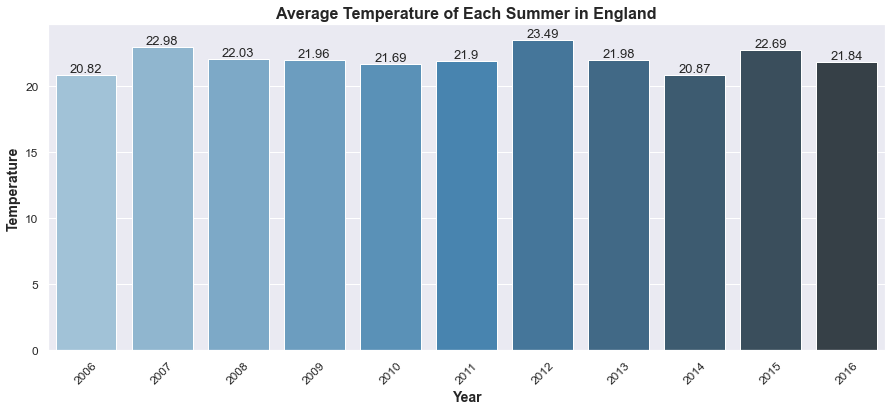

In [110]:
plt.figure(figsize = (15, 6))
ax = sns.barplot(data = summer_by_years, x = summer_by_years["formatted_date"], 
                 y= summer_by_years["temperature_C"], palette=("Blues_d"))
for i, v in enumerate(summer_by_years["temperature_C"]):
    rounded_value = round(v, 2)
    plt.text(i, v, str(rounded_value), ha='center', va='bottom', fontsize = 13)

sns.set_context("poster")
plt.xlabel("Year", fontsize = 14, fontweight = "bold")
plt.ylabel("Temperature", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Average Temperature of Each Summer in England", fontsize = 16, fontweight = "bold")
plt.show()

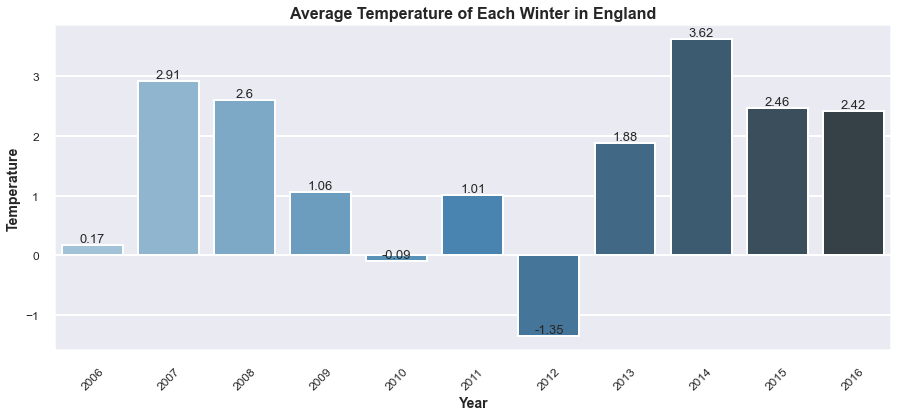

In [111]:
plt.figure(figsize = (15, 6))
ax = sns.barplot(data = winter_by_years, x = winter_by_years["formatted_date"], 
                 y= winter_by_years["temperature_C"], palette=("Blues_d"))
for i, v in enumerate(winter_by_years["temperature_C"]):
    rounded_value = round(v, 2)
    plt.text(i, v, str(rounded_value), ha='center', va='bottom', fontsize = 13)
sns.set_context("poster")
plt.xlabel("Year", fontsize = 14, fontweight = "bold")
plt.ylabel("Temperature", fontsize = 14, fontweight = "bold")
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Average Temperature of Each Winter in England", fontsize = 16, fontweight = "bold")
plt.show()

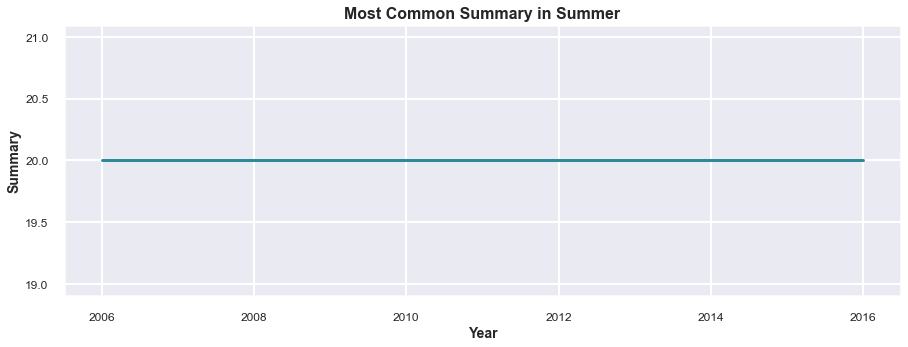

In [112]:
summary_summer_vis = summary_summer.groupby("formatted_date")["summary"].agg(lambda x: x.mode().iloc[0]).reset_index()
plt.figure(figsize = (15, 5))
plt.plot(summary_summer_vis["formatted_date"].values, summary_summer_vis["summary"].values, color = "#2E8A99")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Year", fontsize = 14, fontweight = "bold")
plt.ylabel("Summary", fontsize = 14, fontweight = "bold")
plt.title("Most Common Summary in Summer", fontsize = 16, fontweight = "bold")
plt.show()

The most repeated <b>summary</b> in summer is <b>20</b> that equal <b>Partly Cloudy</b>

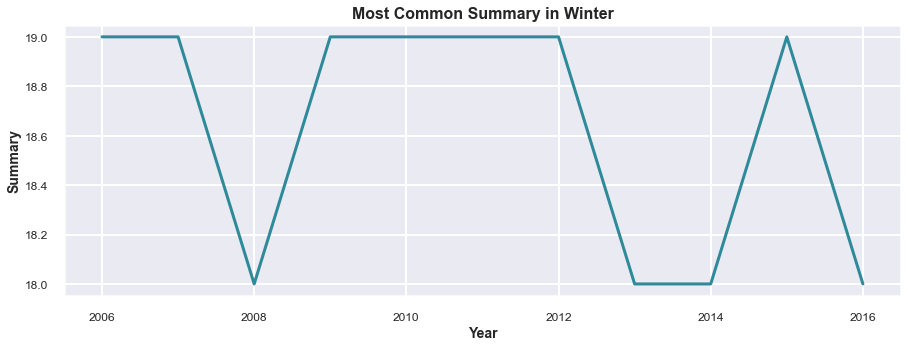

In [113]:
summary_winter_vis = summary_winter.groupby("formatted_date")["summary"].agg(lambda x: x.mode().iloc[0]).reset_index()
plt.figure(figsize = (15, 5))
plt.plot(summary_winter_vis["formatted_date"].values, summary_winter_vis["summary"].values, color = "#2E8A99")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Year", fontsize = 14, fontweight = "bold")
plt.ylabel("Summary", fontsize = 14, fontweight = "bold")
plt.title("Most Common Summary in Winter", fontsize = 16, fontweight = "bold")
plt.show()

The most repeated <b>summary</b> in <b>winter</b> is <b>18, 19</b> that equal <b>Mostly Cloudy, Overcast</b>

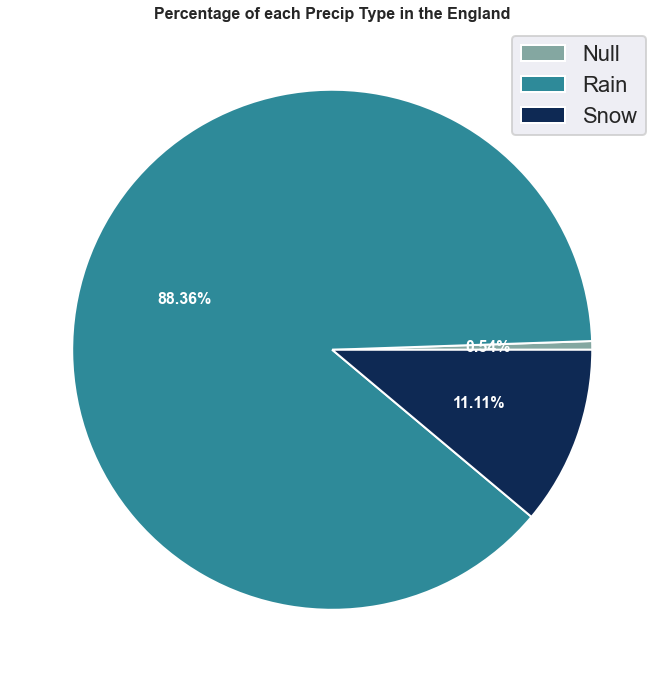

In [114]:
plt.figure(figsize = (15,10))
palette_color = sns.color_palette('deep')
plt.pie(precip_type_df["Count"], labels = precip_type_df["Type"], 
        autopct = '%0.2f%%', 
        textprops = {'size':16, 'fontweight': 'bold', 'color': 'w'},
        colors = ["#84A7A1", "#2E8A99", "#0E2954"])
plt.title("Percentage of each Precip Type in the England", fontsize = 16, fontweight = 'bold')
plt.legend(loc = "upper right")
plt.tight_layout()
plt.show()

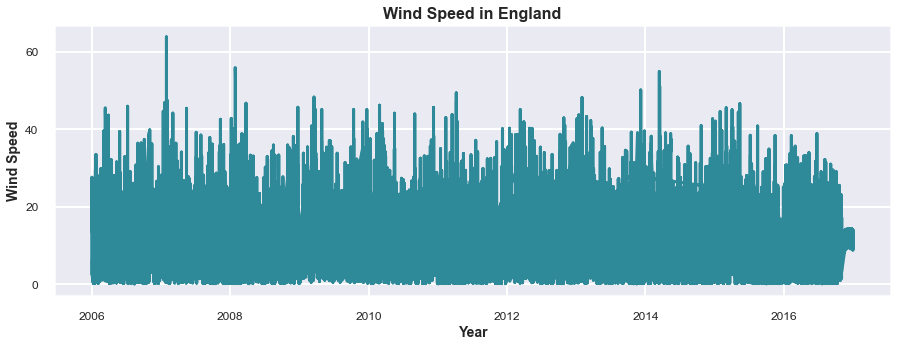

In [115]:
plt.figure(figsize = (15, 5))
plt.plot(england_weather_df["formatted_date"].values, england_weather_df["wind_speed_km_h"].values, color = "#2E8A99")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Year", fontsize = 14, fontweight = "bold")
plt.ylabel("Wind Speed", fontsize = 14, fontweight = "bold")
plt.title("Wind Speed in England", fontsize = 16, fontweight = "bold")
plt.show()

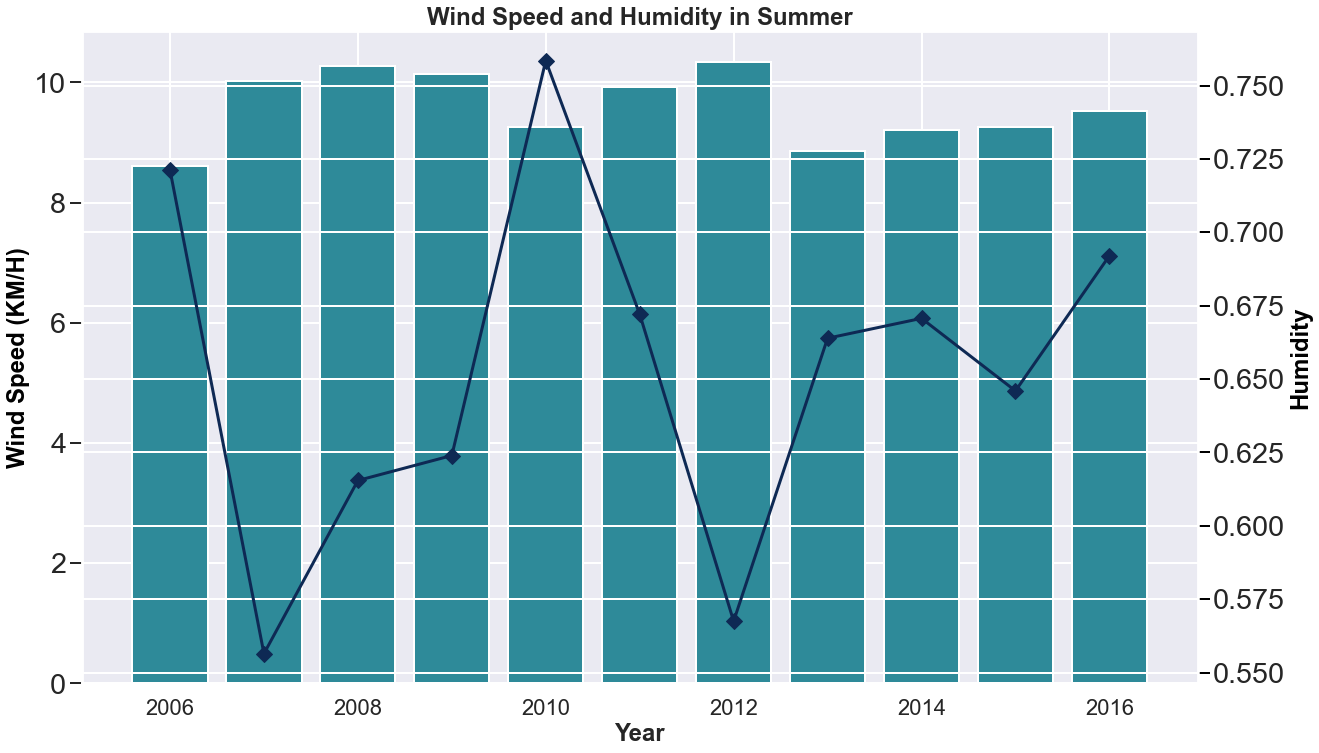

In [116]:
fig, ax = plt.subplots(figsize = (20, 12))
ax.bar(summer_by_years["formatted_date"],
       summer_by_years["wind_speed_km_h"],
       color = '#2E8A99')
ax.set_ylabel("Wind Speed (KM/H)",color = "black", weight = 'bold')
ax.tick_params(axis="y", width = 2, labelsize = 'large')


ax1 = ax.twinx()
ax1.plot(summer_by_years["formatted_date"].values,
         summer_by_years["humidity"].values,
         color = '#0E2954',
         marker = 'D')
ax1.set_ylabel("Humidity", color = 'black', weight = "bold")
ax1.tick_params(axis="y", color = "black", width = 2, labelsize = 'large')

ax.set_xlabel("Year", weight = 'bold')
ax.set_title("Wind Speed and Humidity in Summer", weight = 'bold')

plt.show()

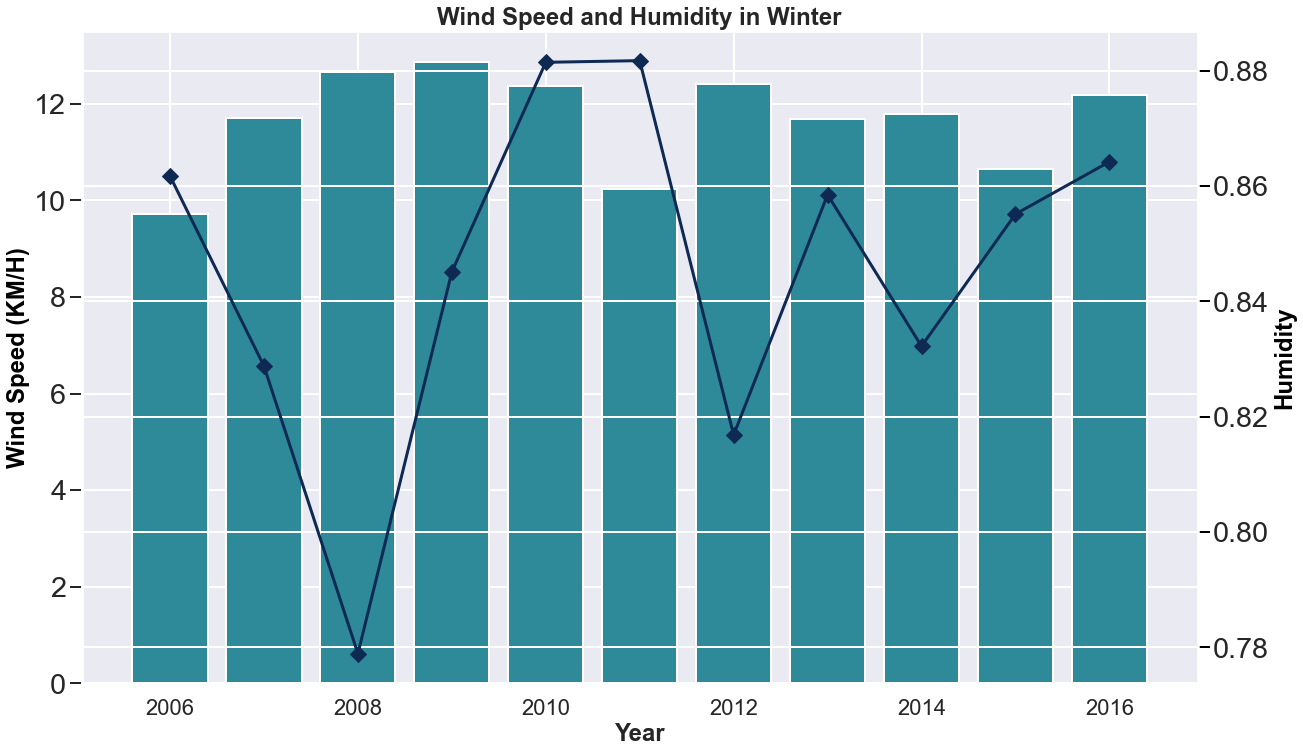

In [117]:
fig, ax = plt.subplots(figsize = (20, 12))
ax.bar(winter_by_years["formatted_date"],
       winter_by_years["wind_speed_km_h"],
       color = '#2E8A99')
ax.set_ylabel("Wind Speed (KM/H)",color = "black", weight = 'bold')
ax.tick_params(axis="y", width = 2, labelsize = 'large')


ax1 = ax.twinx()
ax1.plot(winter_by_years["formatted_date"].values,
         winter_by_years["humidity"].values,
         color = '#0E2954',
         marker = 'D')
ax1.set_ylabel("Humidity", color = 'black', weight = "bold")
ax1.tick_params(axis="y", color = "black", width = 2, labelsize = 'large')

ax.set_xlabel("Year", weight = 'bold')
ax.set_title("Wind Speed and Humidity in Winter", weight = 'bold')

plt.show()

### End of The Project, Thank You